**1. Apa Kabar Jawa Barat?**

    Info: Dataset telah diperbarui url-nya pada tanggal 6 Juni 2022, 
    yaitu https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json.
 

Anda telah berhasil menjawab pertanyaan mengenai kondisi COVID-19 di Indonesia dengan menggunakan data yang langsung diambil menggunakan API. Namun bagaimana jika Anda ingin berfokus dengan data COVID-19 di provinsi tempat menetap saat ini?

covid19.go.id menyediakan data kasus COVID-19 tingkat provinsi di alamat API yang berbeda. Sebagai data mengenai COVID-19 Jawa Barat, tempat tinggal saya sekarang, tersedia di https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json.

In [14]:
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


**2. Memahami Kasus COVID-19 di Jawa Barat**


Sekarang jalankanlah method <code>keys()</code> pada <code>cov_jabar_raw</code> tersebut untuk mengetahui nama-nama elemen utama yang tersedia dan jawablah pertanyaan berikut:

- Berapa jumlah total kasus COVID-19 di Jawa Barat?
- Berapa persentase kematian akibat COVID-19 di Jawa Barat?
- Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat?

In [15]:
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()

print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat                 : 1105134
Persentase kematian akibat COVID-19 di Jawa Barat         : 1.425619.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 98.282380.2%


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


**3. Memperoleh Informasi yang Lebih Lengkap**


Informasi umum mengenai COVID-19 di Jawa Barat telah Anda dapatkan. Namun informasi akan lebih lengkap jika Anda memiliki data perkembangan COVID-19 dari waktu ke waktu, apakah Anda setuju?

Kabar baiknya adalah informasi tersebut juga disediakan oleh covid19.go.id melalui permintaan API yang telah Anda buat sebelumnya (atau https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json). 

Data historis perkembangan COVID-19 tersebut tersimpan dengan nama <code>list_perkembangan</code>. Silakan Anda ekstrak data tersebut dari <code>cov_jabar_raw</code> dan untuk lebih memudahkan dalam menginspeksi data ubahlah data bertipe <code>dict</code> ke pandas dataframe. Kemudian simpanlah hasilnya sebagai obyek bernama <code>cov_jabar</code>! Amati struktur <code>cov_jabar</code> menggunakan method <code>info()</code> dan <code>head()</code>.

In [16]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()

cov_jabar= pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       785 non-null    int64
 1   KASUS                         785 non-null    int64
 2   MENINGGAL                     785 non-null    int64
 3   SEMBUH                        785 non-null    int64
 4   DIRAWAT_OR_ISOLASI            785 non-null    int64
 5   AKUMULASI_KASUS               785 non-null    int64
 6   AKUMULASI_SEMBUH              785 non-null    int64
 7   AKUMULASI_MENINGGAL           785 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  785 non-null    int64
dtypes: int64(9)
memory usage: 55.3 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583193600000      1          1       0                   0   
1  1583280000000      1          0       0   

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


**4. Menjinakkan Data**


Setelah mengekstrak dan mengamati cov_jabar, Anda menemukan beberapa kejanggalan pada data tersebut. Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. Sekarang Anda akan mencoba melakukan beberapa tahapan untuk menjinakan data tersebut sehingga dapat diolah dan dianalisis dengan lebih mudah.

Ada beberapa tahapan yang akan Anda lakukan untuk menjinakan data <code>cov_jabar</code>, yaitu:

- Menghapus kolom <code>DIRAWAT_OR_ISOLASI</code> dan semua kolom yang berisi nilai kumulatif
- Merubah format penulisan semua kolom menjadi huruf kecil
- Mengganti nama kolom <code>kasus</code> menjadi <code>kasus_baru</code>
- Memperbaiki tipe data pada kolom <code>tanggal</code> menggunakan <code>pd.to_datetime</code>

Lengkapilah baris kode berikut untuk melakukan menjinakan data sesuai dengan tahapan yang telah Anda rencanakan! Anda akan menggunakan teknik chaining pada dataframe. Simpan hasil pengolahan Anda dengan nama <code>cov_jabar_tidy</code>.

In [17]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-03           1          1       0
1 2020-03-04           1          0       0
2 2020-03-05           1          0       0
3 2020-03-06           1          0       0
4 2020-03-07           0          0       0


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


**5. Menunjukkan Melalui Gambar**

Akhirnya Anda berhasil menjinakan data <code>cov_jabar</code> menjadi <code>cov_jabar_tidy</code> sehingga lebih mudah untuk diolah, selamat! Memiliki data yang rapi memang menyenangkan, apakah Anda setuju dengan hal tersebut?

Setelah memiliki data yang jinak, sekarang saatnya Anda mengekspresikan data tersebut dalam bentuk lain yang harapannya lebih mudah dicerna: grafik. Anda akan memulai merancang visualisasi yang memiliki estetika dengan menggunakan library <code>matplotlib</code>. Imporlah library tersebut sebagai aliasnya!

In [18]:
import matplotlib.pyplot as plt

**6. Menunjukkan Melalui Gambar - 2**

 
Berikut merupakan template kode untuk membuat visualisasi menggunakan matplotlib:
```
fig, ax = plt.subplots(figsize=(...,...))
ax.jenis_plot(data=...., x=..., height=....)
```


Berdasarkan templat tersebut, komponen utama untuk membuat visualisasi antara lain adalah tabel data, kolom data, serta bentuk geometri untuk mempresentasikan data. Sebagai contoh untuk membuat scatter-plot yang diperlukan adalah bentuk geometri titik (<code>.scatter()</code>), line-chart memerlukan geometri garis (<code>.plot()</code>), sedangkan bar-chart memerlukan bentuk geometri batang atau kolom (<code>.bar()</code>).

Lengkapi baris kode berikut untuk membuat bar-chart jumlah kasus baru harian COVID-19 di Jawa Barat menggunakan data <code>cov_jabar_tidy</code>! Pergunakan kolom <code>tanggal</code> sebagai sumbu-x.

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

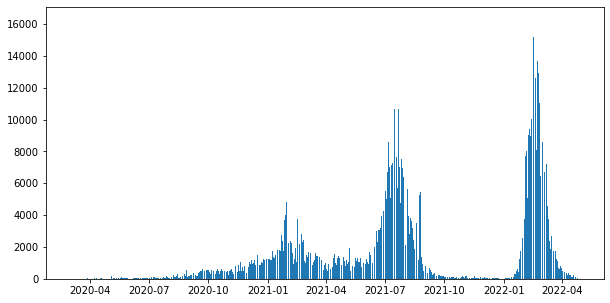

In [19]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()

**7. Informasi pada Grafik**

 

Anda telah berhasil membuat bar-chart yang diminta. Namun grafik tersebut belum memiliki informasi yang jelas serta cenderung membosankan untuk dilihat. Sekarang silakan buat kembali grafik tersebut dengan menggunakan baris kode yang telah dimodifikasi berikut:

Bar chart ini menunjukkan kondisi kasus harian postif COVID19 di Jawab Barat hingga Oktober 2020

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

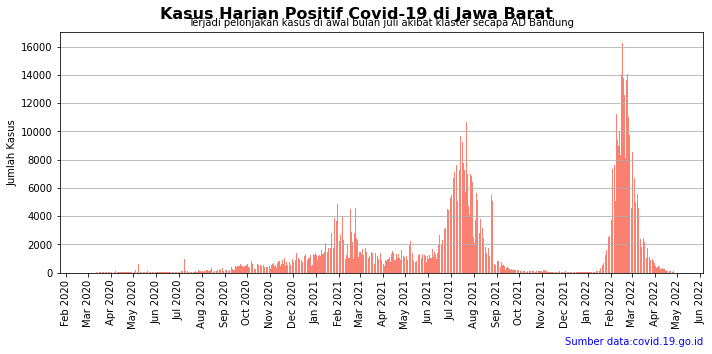

In [20]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif Covid-19 di Jawa Barat', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Terjadi pelonjakan kasus di awal bulan juli akibat klaster secapa AD Bandung',
             fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data:covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**8. Grafik untuk Kasus Sembuh**

 

Sekarang buatlah grafik serupa dengan menggunakan data kasus sembuh menggunakan warna <code>olivedrab</code>!

Untuk kasus harian sembuh dari COVID19 di Jawa Barat hingga Oktober 2020 ditunjukkan oleh grafik:

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

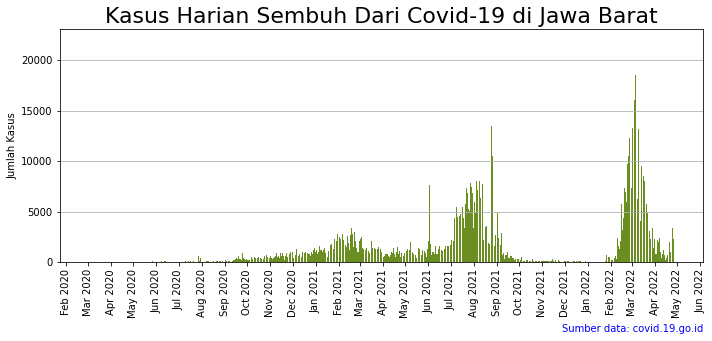

In [21]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh Dari Covid-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**9. Grafik untuk Kasus Meninggal**


Sekarang buatlah grafik serupa dengan menggunakan data kasus meninggal menggunakan warna <code>slategrey</code>!

Berikut ini ditampilkan kondisi harian meninggal akibat COVID19 di Jawa Barat hingga Oktober 2020



/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


<Figure size 432x288 with 0 Axes>

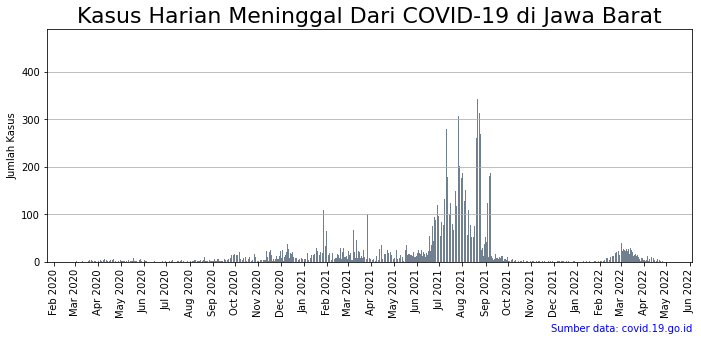

In [22]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Barat',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()